In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Display basic information about the dataset
df = pd.read_csv('C:\\Things\\Programare\\Housing.csv')

df.head(10)

df.info()

df.describe()

df.shape

df.isna().sum()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


0

In [3]:
# Renaming 'area' column to 'area(m2)'
df.rename(columns={'area':'area(m2)'},inplace=True)
df

,price,area(m2),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
# Separating numeric and categorical columns
numeric_cols=[]
cat_cols=[]
price_col=df.price
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area(m2)' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


 Univariate analysis for price column:


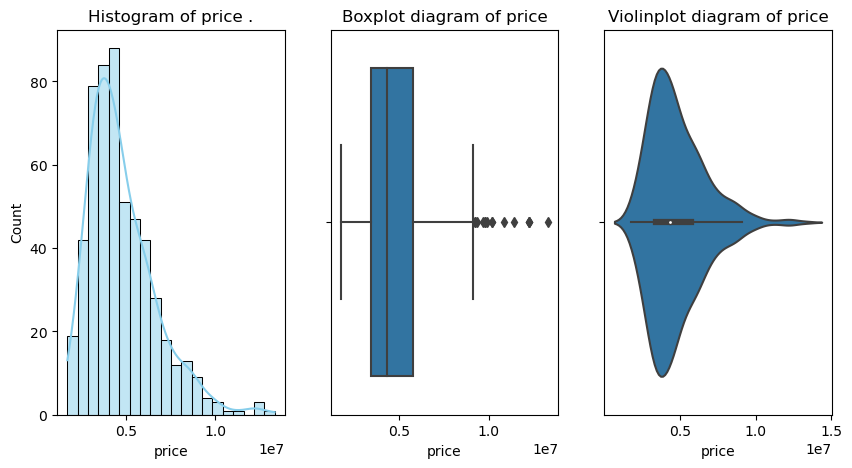

 Univariate analysis for area(m2) column:


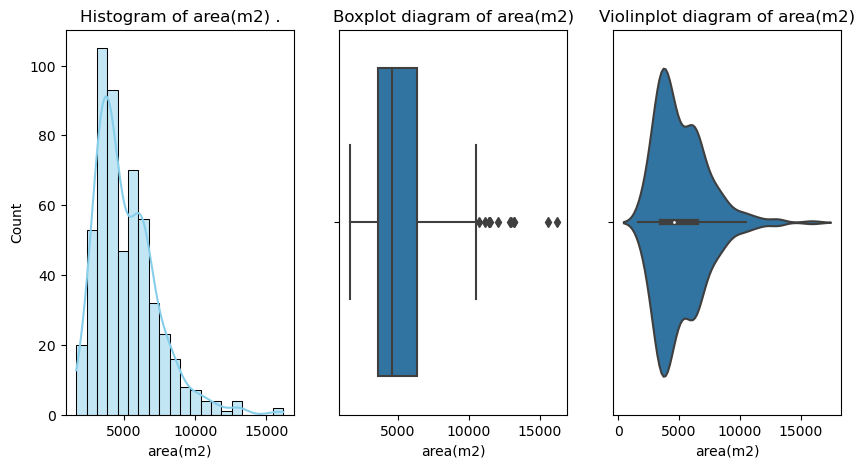

 Univariate analysis for bedrooms column:


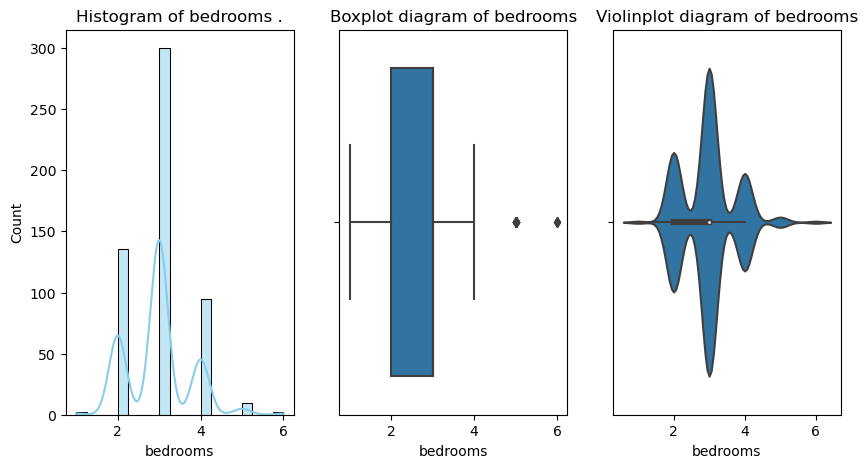

 Univariate analysis for bathrooms column:


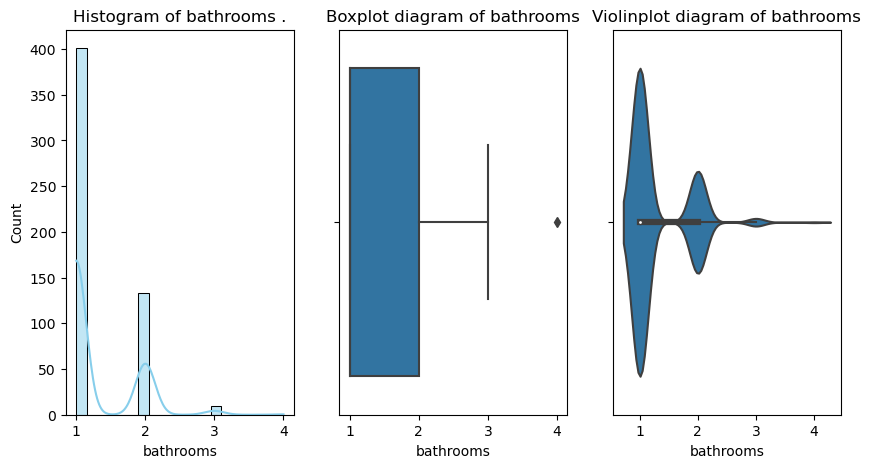

 Univariate analysis for stories column:


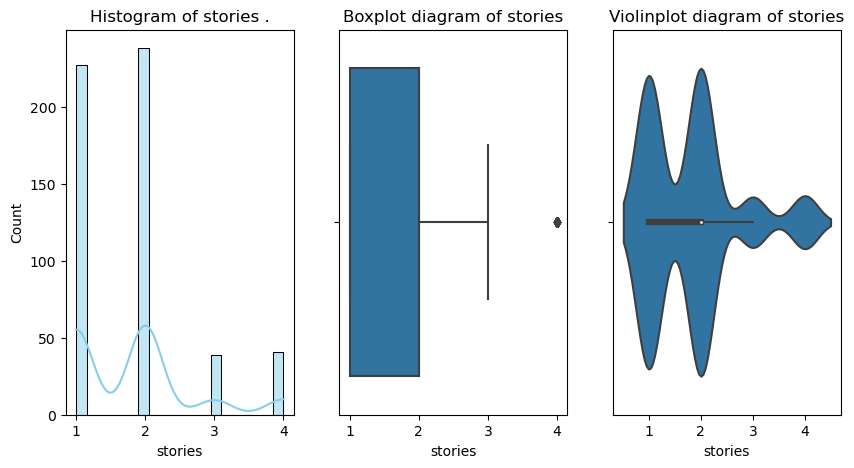

 Univariate analysis for parking column:


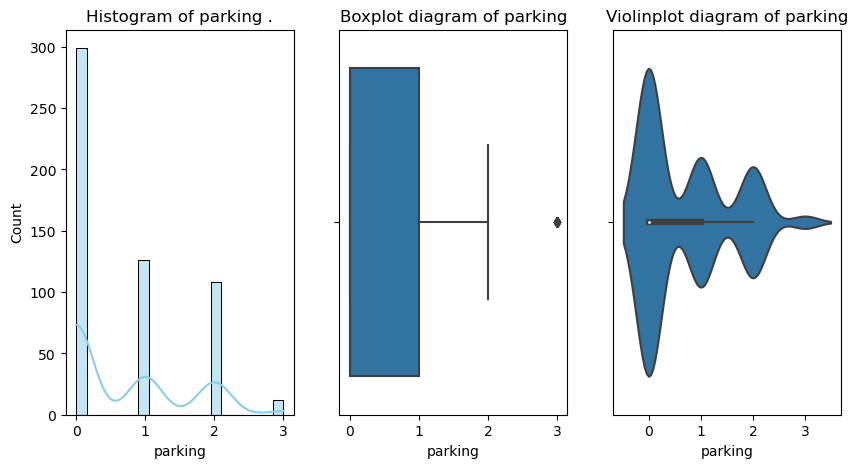

In [5]:
# Data Visualization: Univariate analysis for numeric columns
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 3, figsize=(10,5))    
    sns.histplot(df[col], kde=True, bins=20, color='skyblue',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')
    
    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}')
    
    sns.violinplot(x=df[col],ax=ax[2])
    ax[2].set_title(f'Violinplot diagram of {col}')
    plt.show()
    
for col in numeric_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)
        

 Univariate analysis for mainroad column:


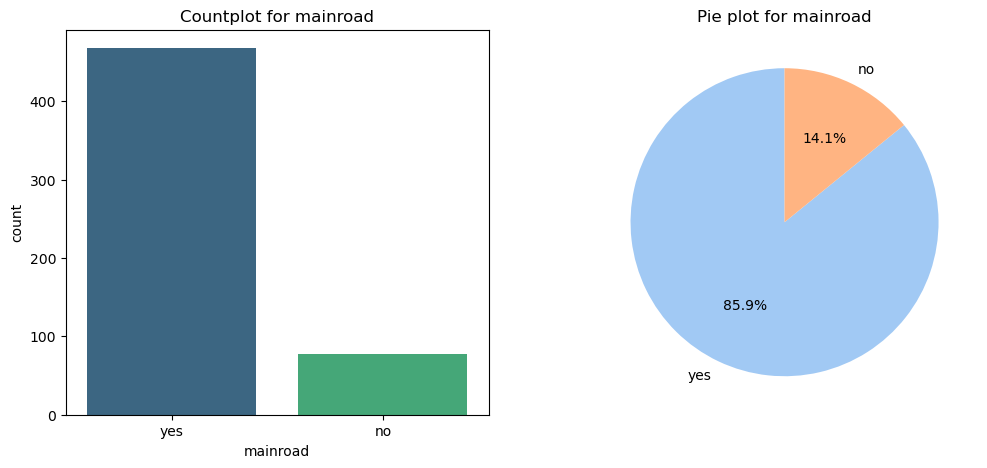

 Univariate analysis for guestroom column:


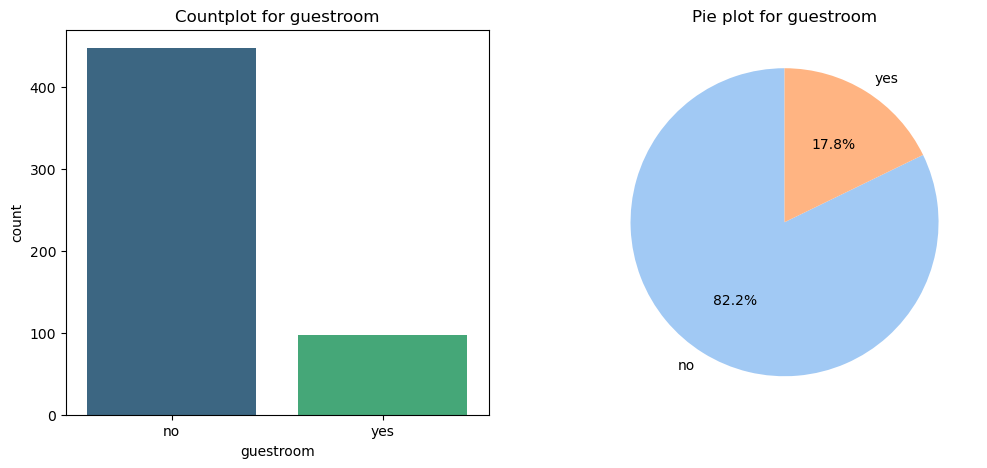

 Univariate analysis for basement column:


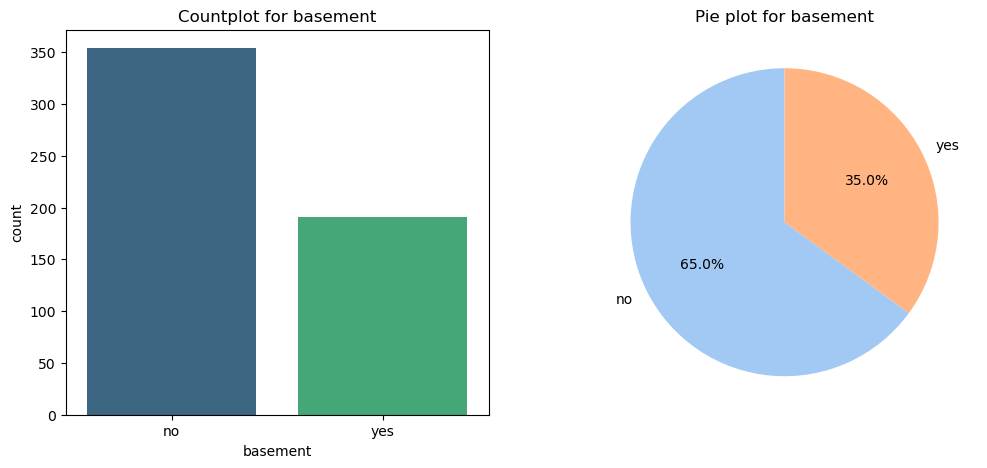

 Univariate analysis for hotwaterheating column:


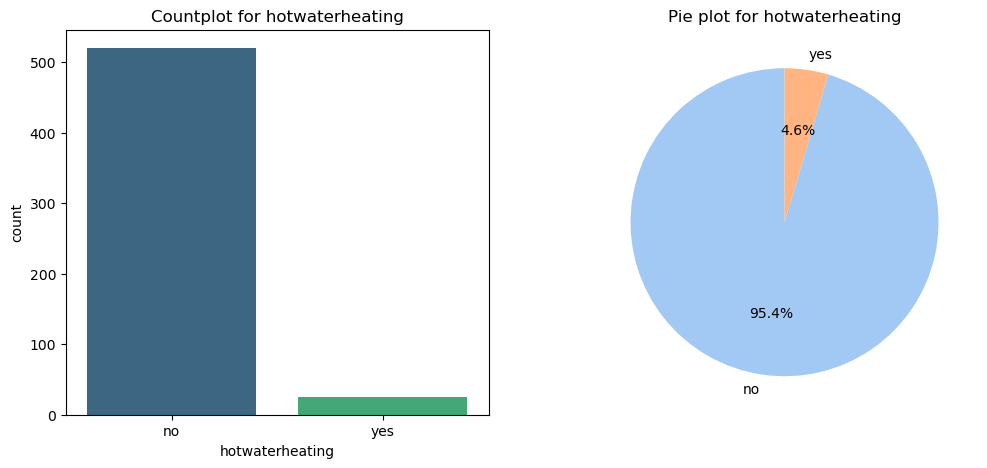

 Univariate analysis for airconditioning column:


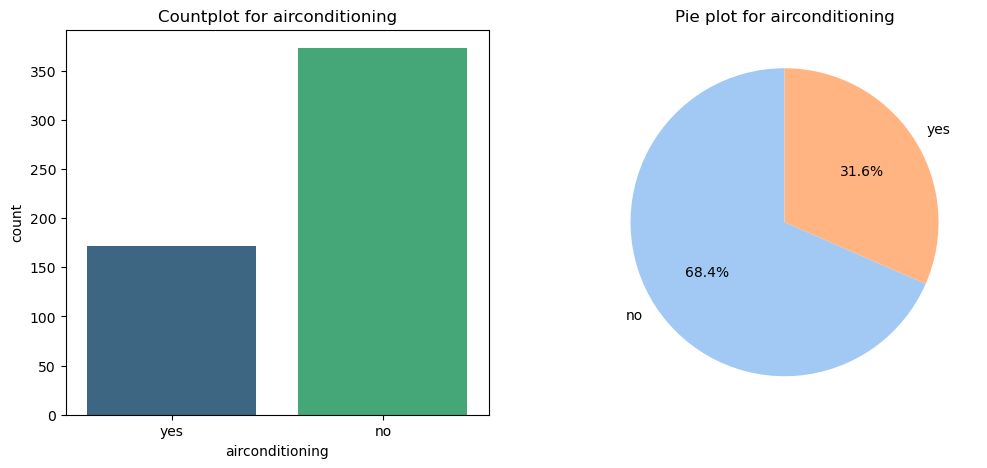

 Univariate analysis for prefarea column:


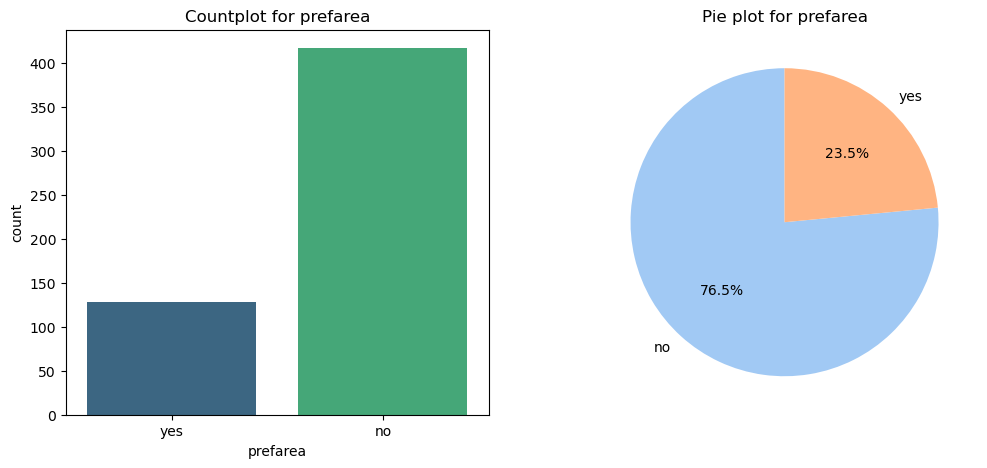

 Univariate analysis for furnishingstatus column:


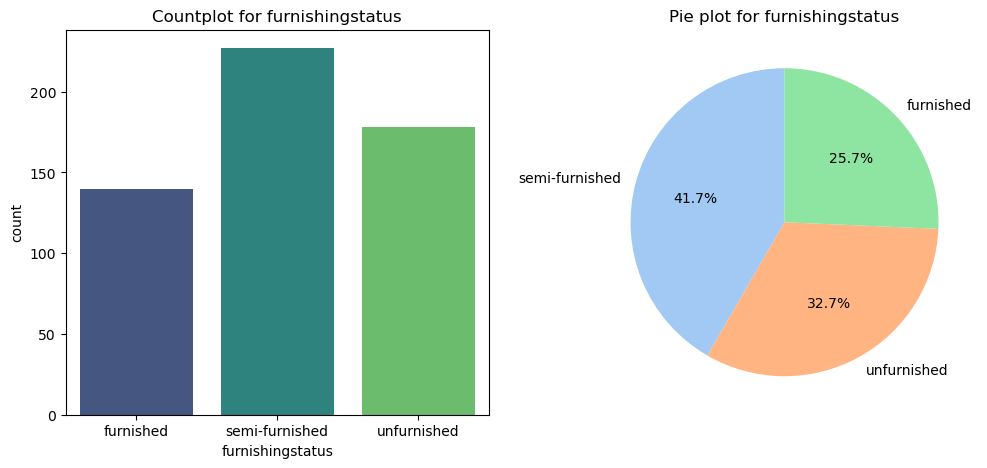

In [6]:
# Data Visualization: Univariate analysis for categorical columns
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(data=df,x=df[col], palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    
    plt.show()

for col in cat_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

Bivariate analysis between area(m2) and price


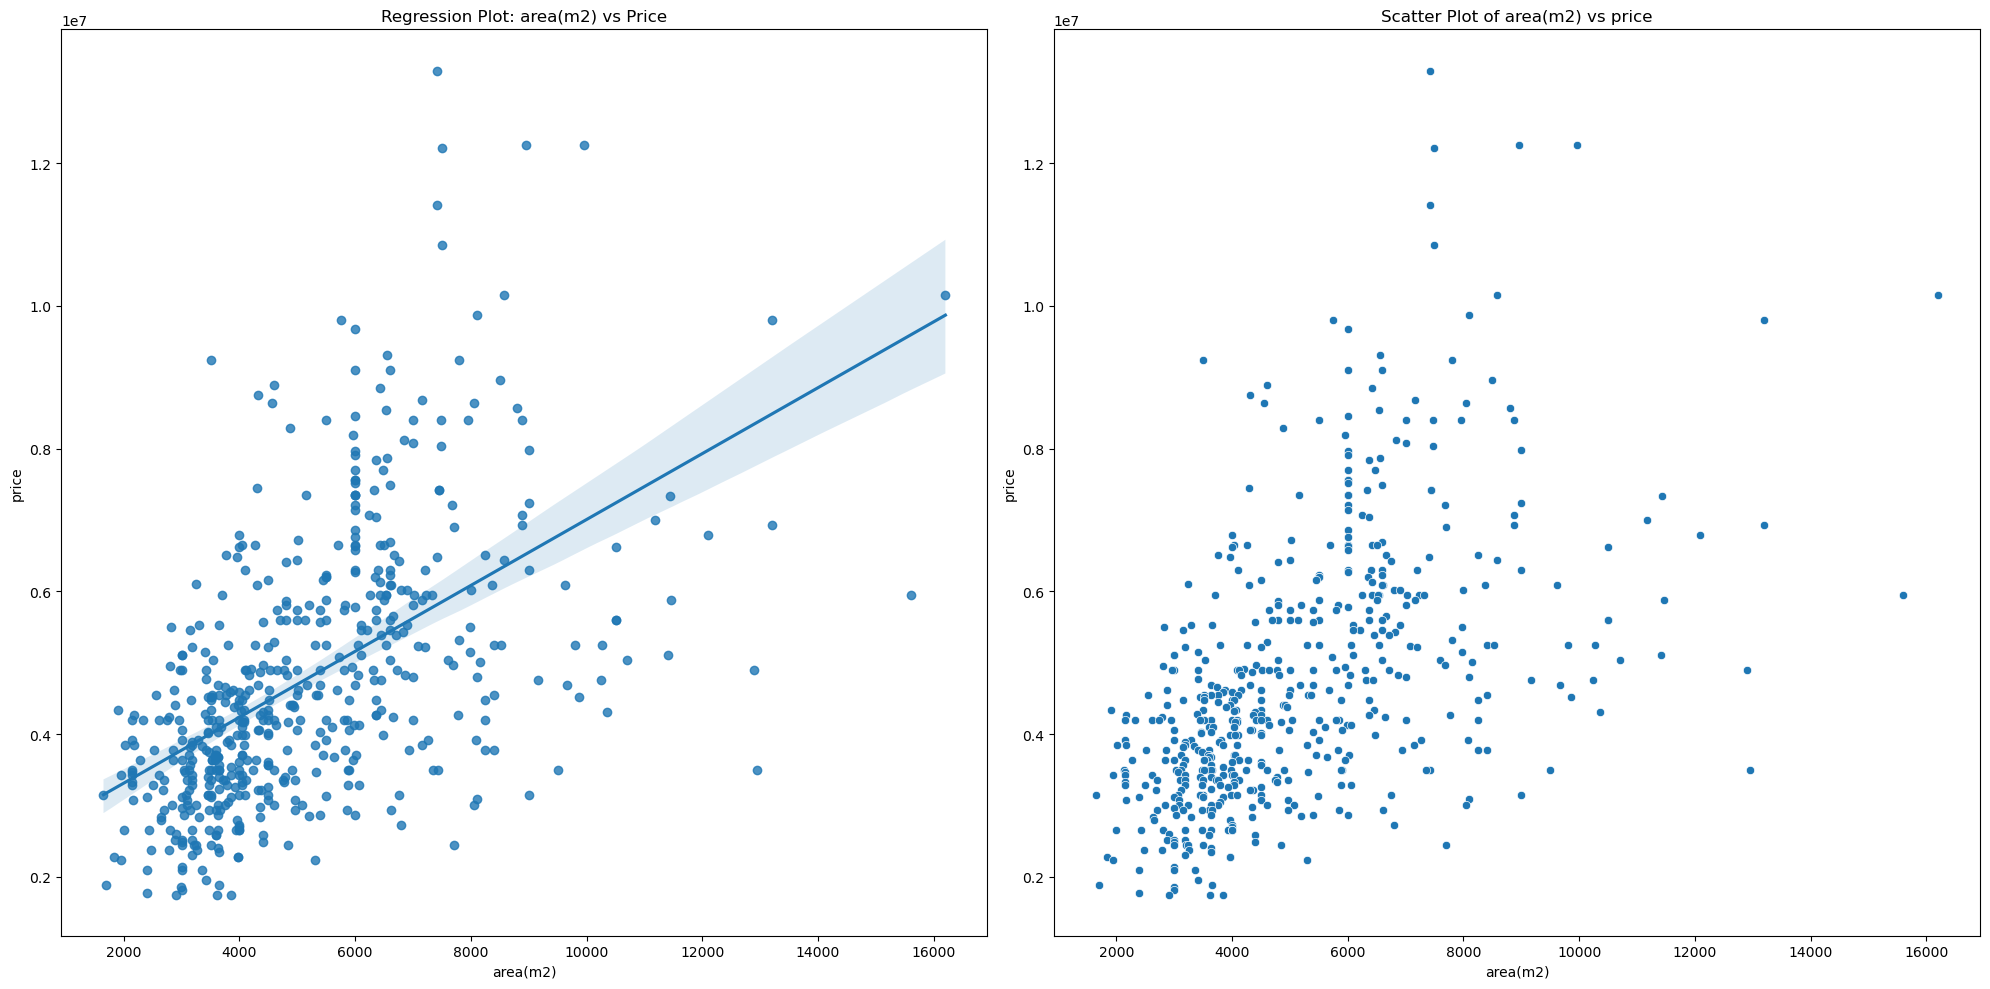

Bivariate analysis between bedrooms and price


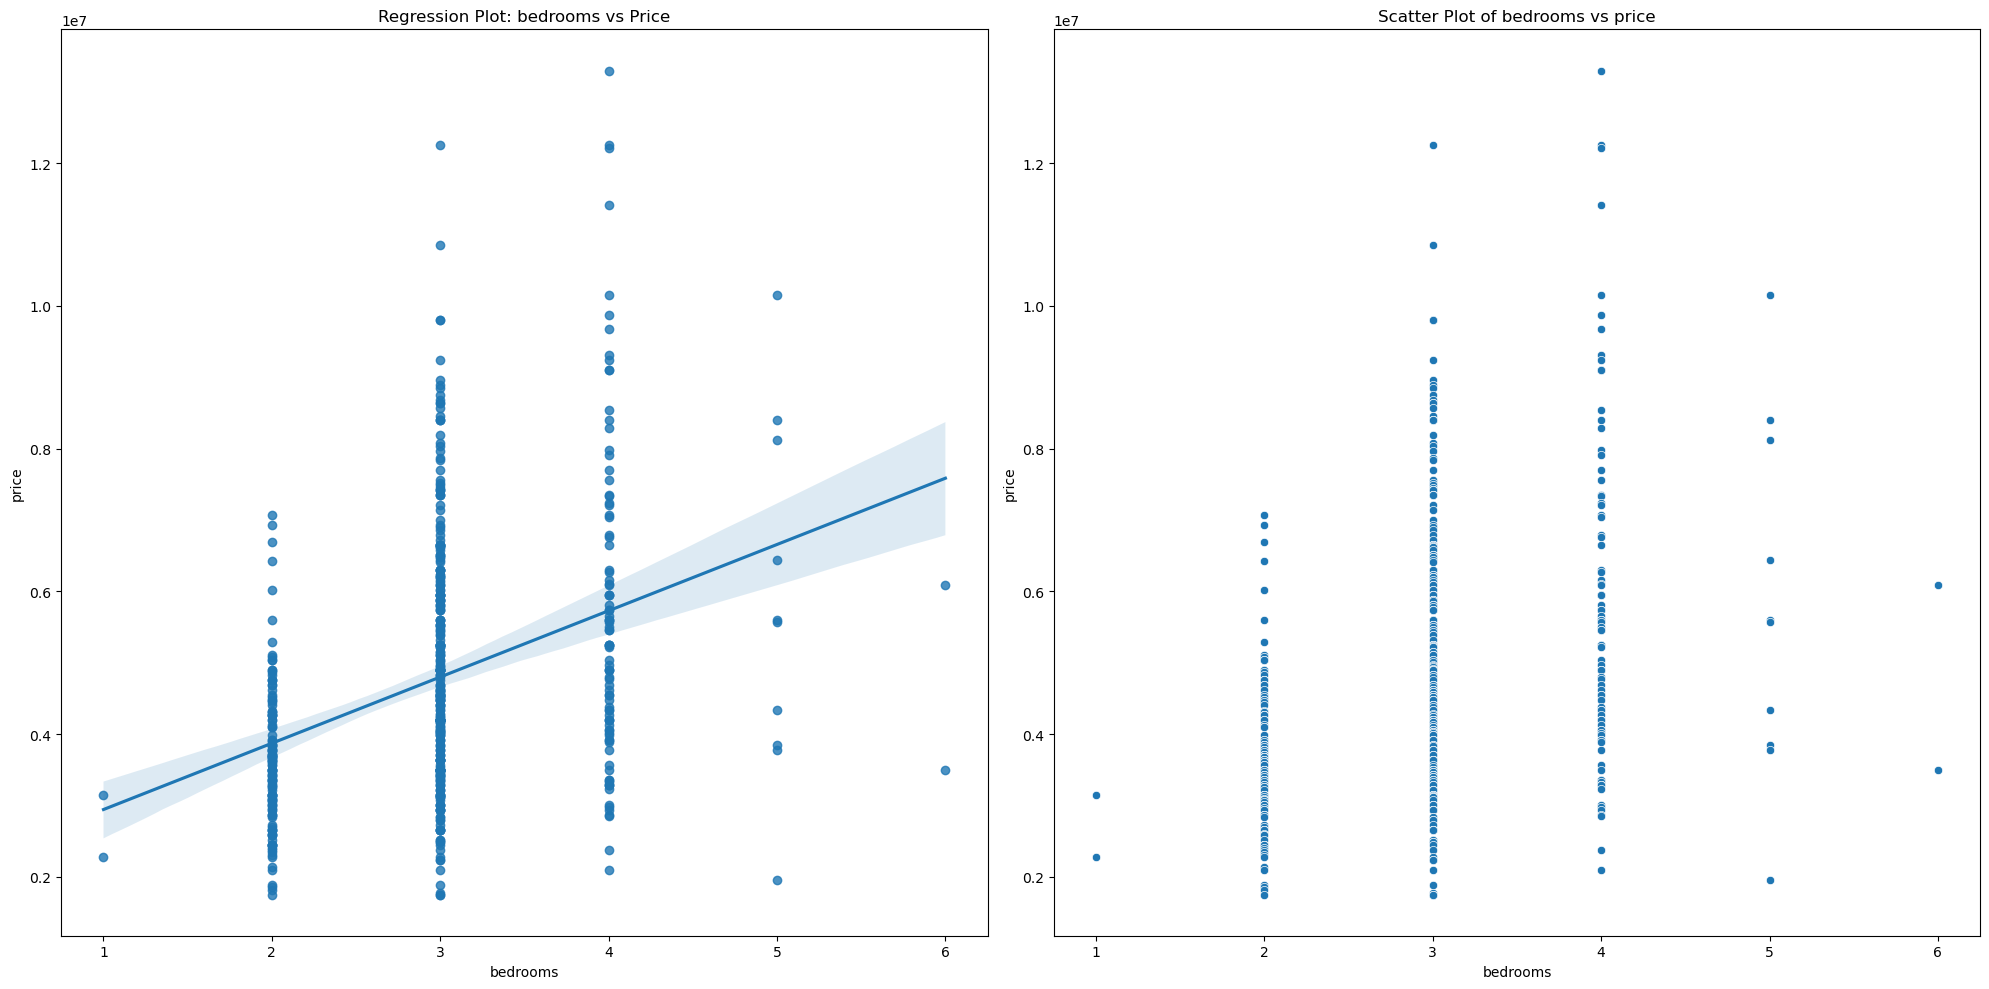

Bivariate analysis between bathrooms and price


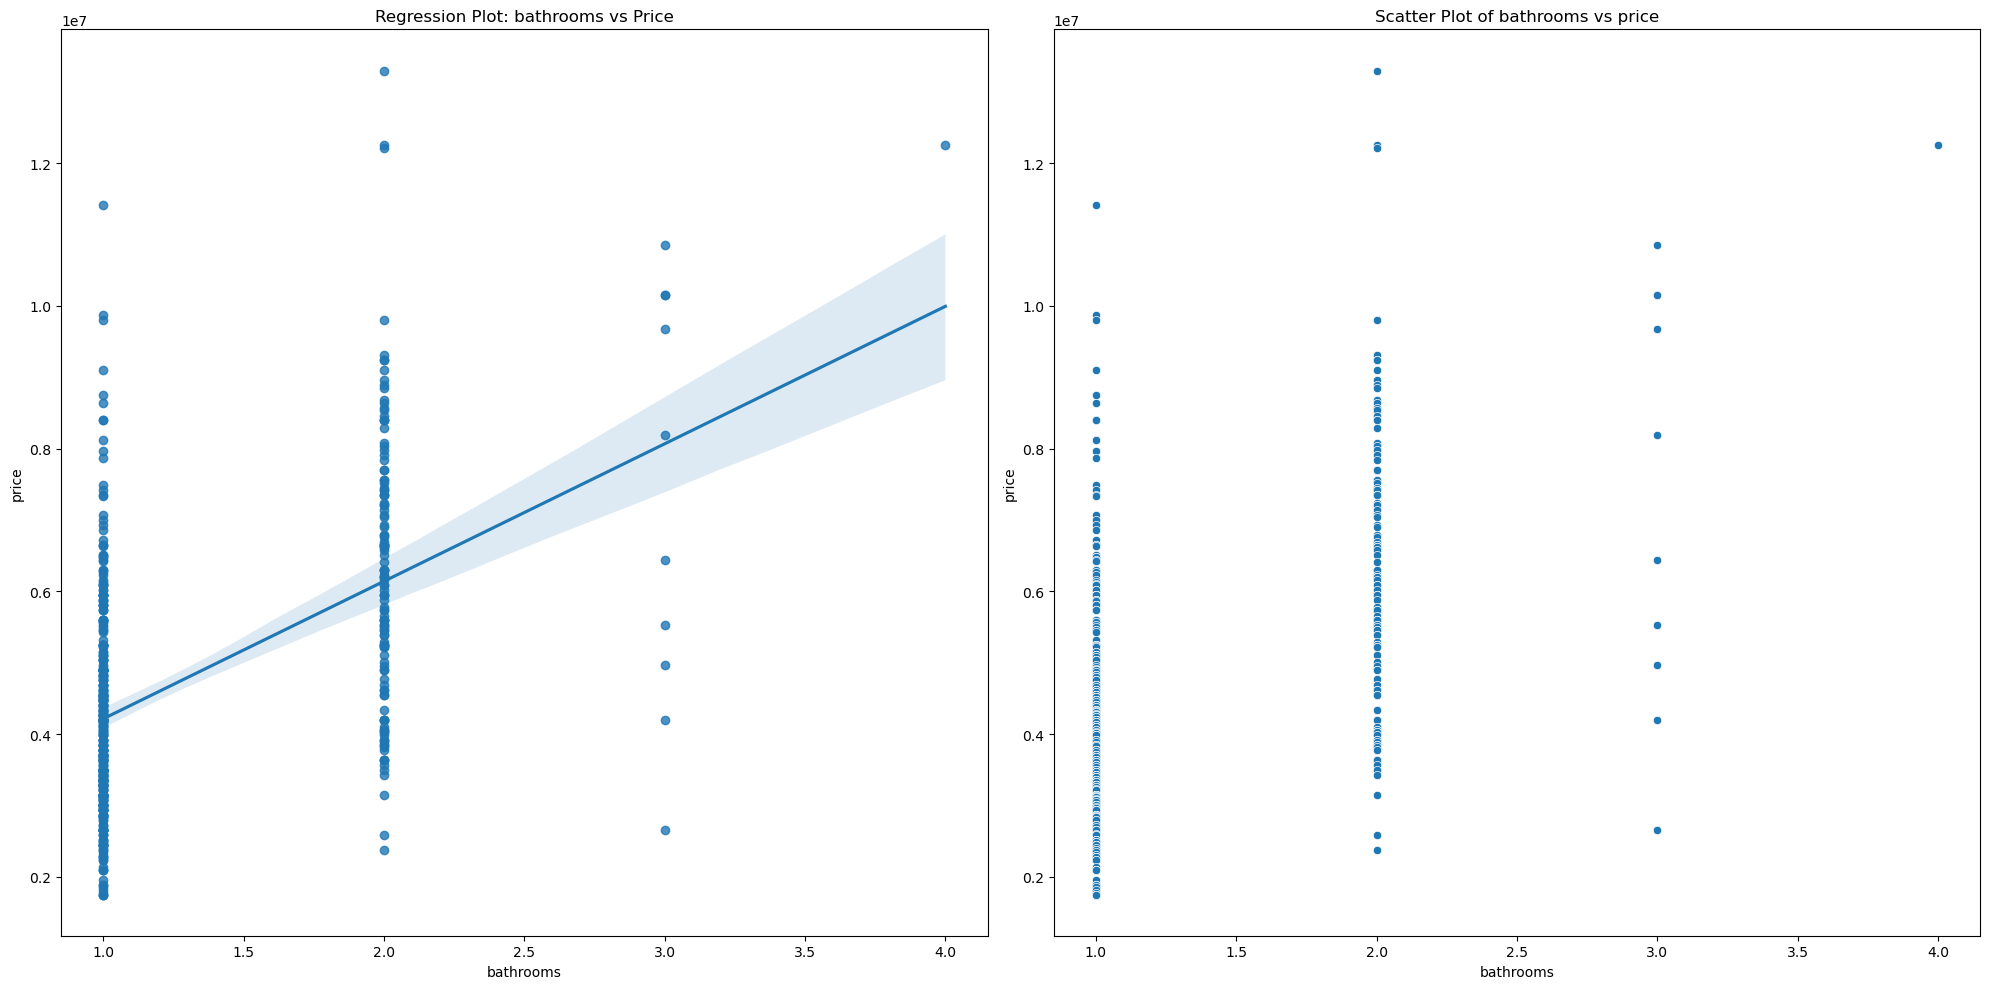

Bivariate analysis between stories and price


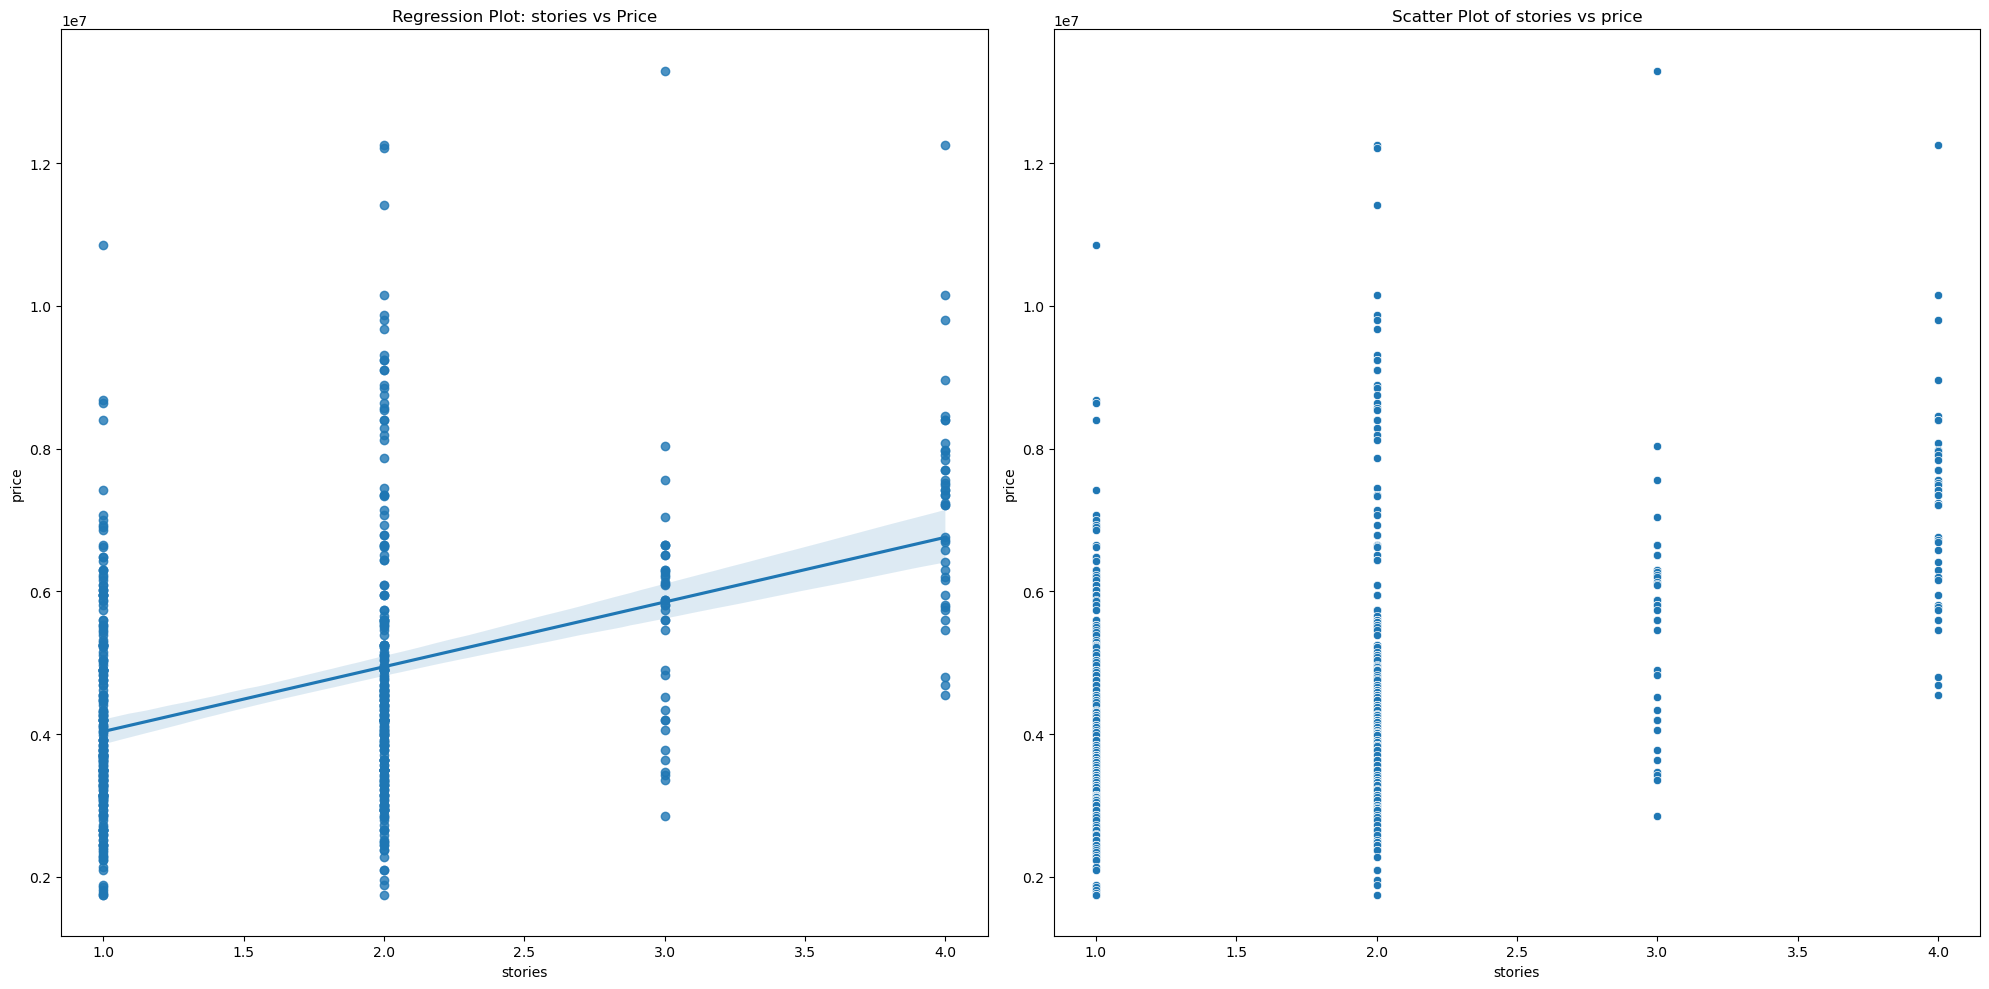

Bivariate analysis between parking and price


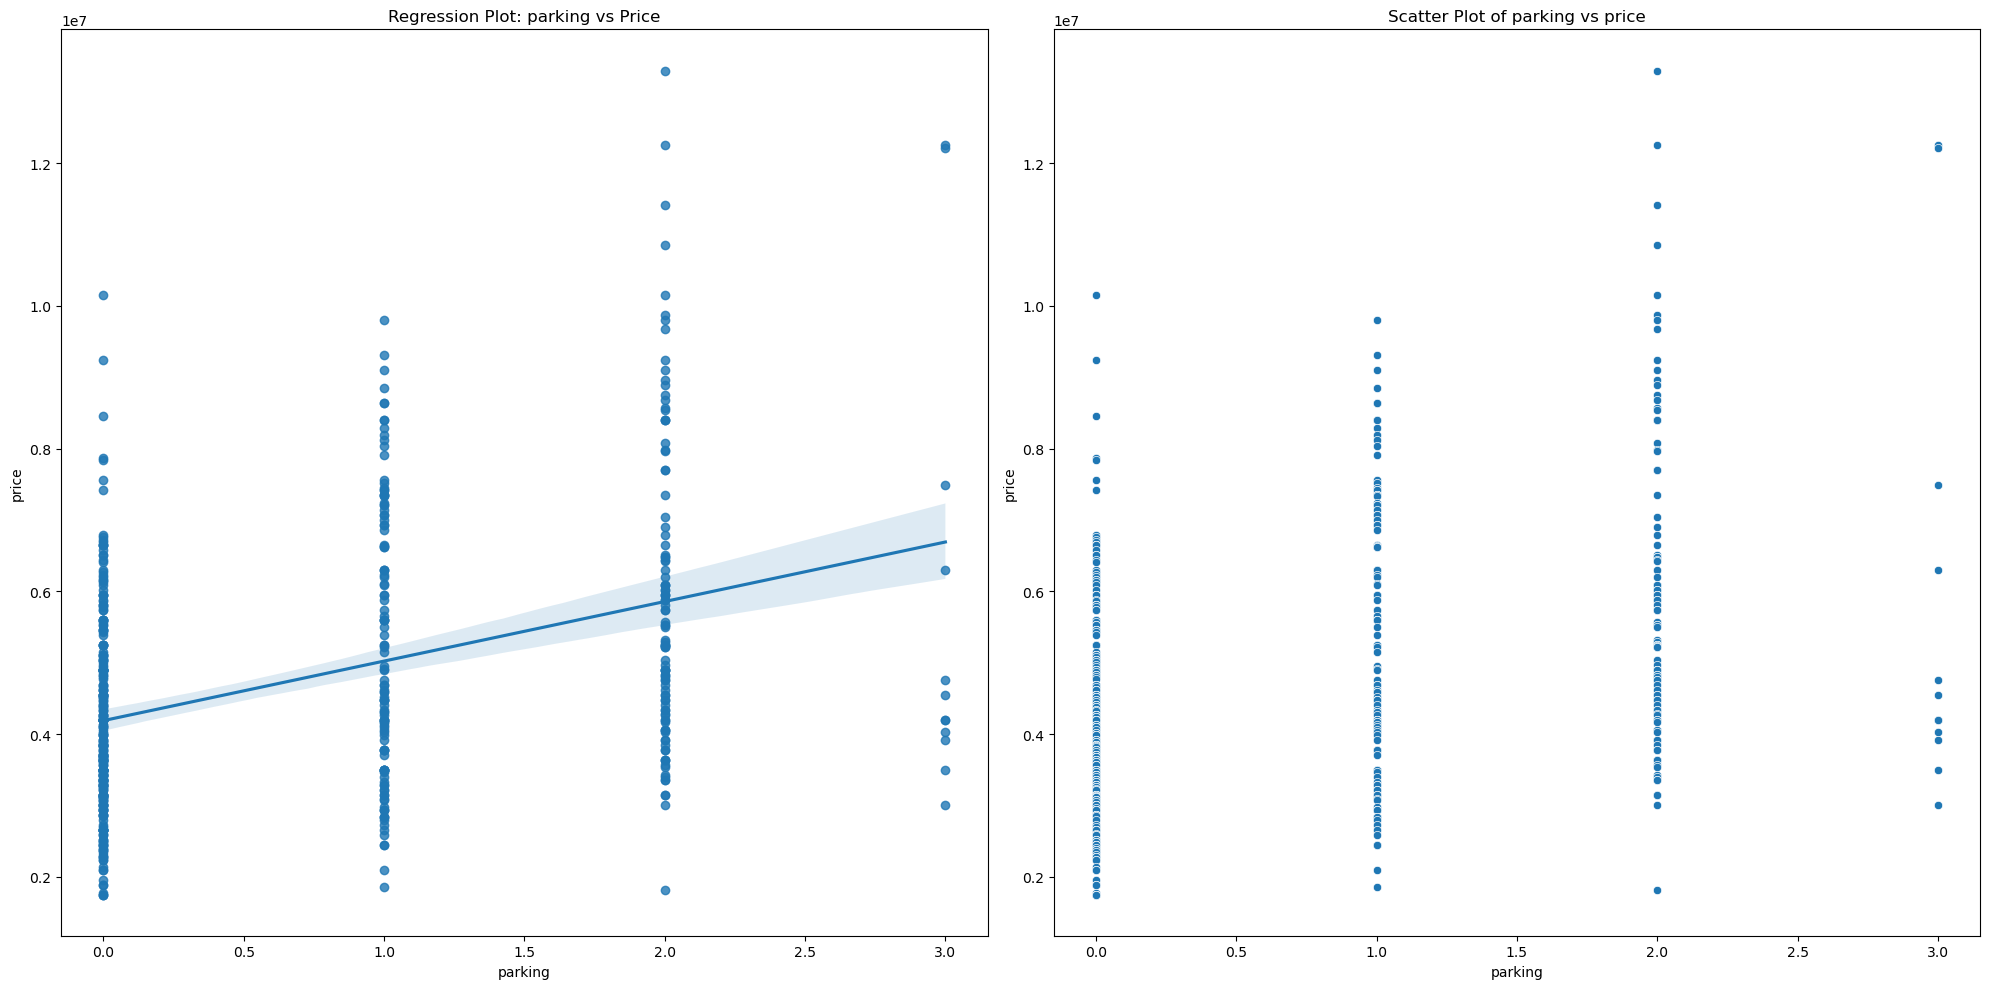

In [7]:
# Data Visualization: Bivariate analysis between numeric columns and target variable 'price'
def bivariate_num_col(col):
     # Set the color palette
    sns.set_palette("tab10")
    
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # reg plot
    sns.regplot(x=df[col], y=df['price'], ax=ax[0])
    ax[0].set_title(f'Regression Plot: {col} vs Price')

    # Scatter plot
    sns.scatterplot(x=col, y='price', data=df, ax=ax[1])
    ax[1].set_title(f'Scatter Plot of {col} vs price')
    

    plt.tight_layout()
    plt.show()
    
    
for col in numeric_cols[1:]:
    print(f'Bivariate analysis between {col} and price')
    bivariate_num_col(col)

Bivariate analysis between guestroom and price


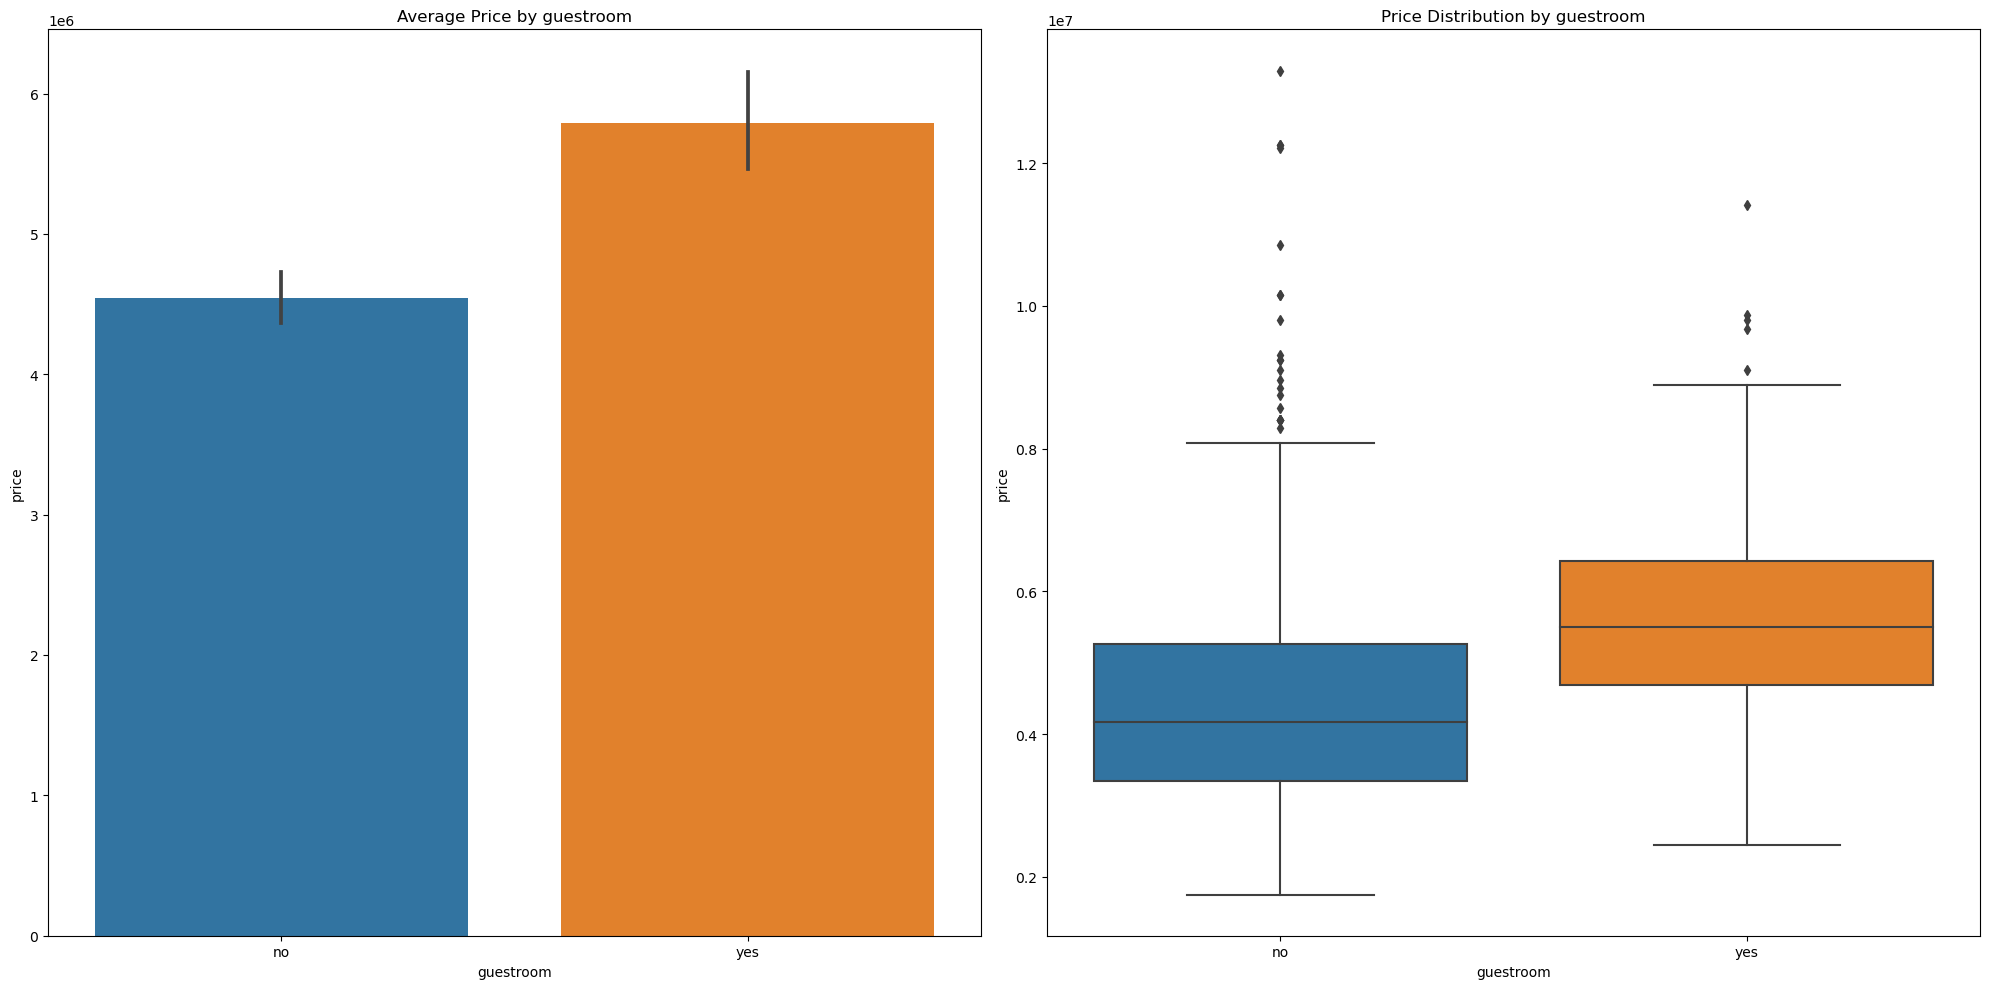

Bivariate analysis between basement and price


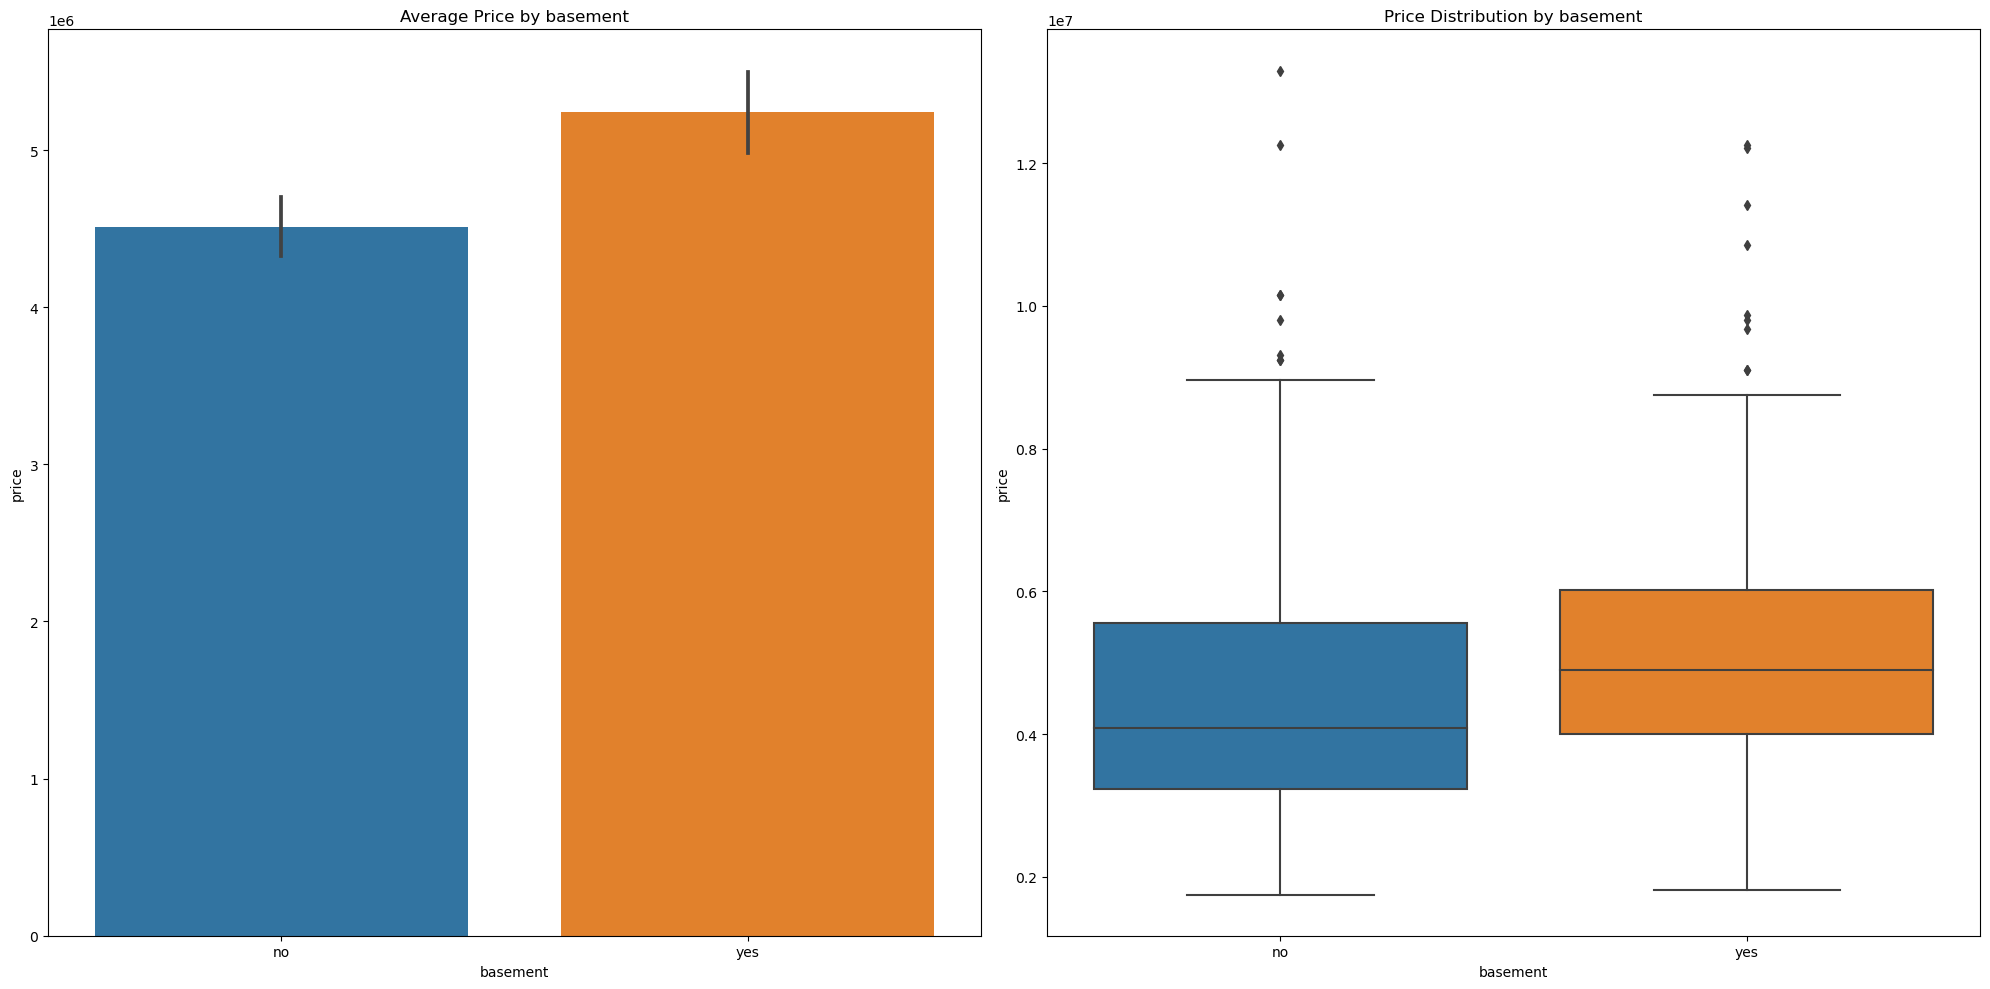

Bivariate analysis between hotwaterheating and price


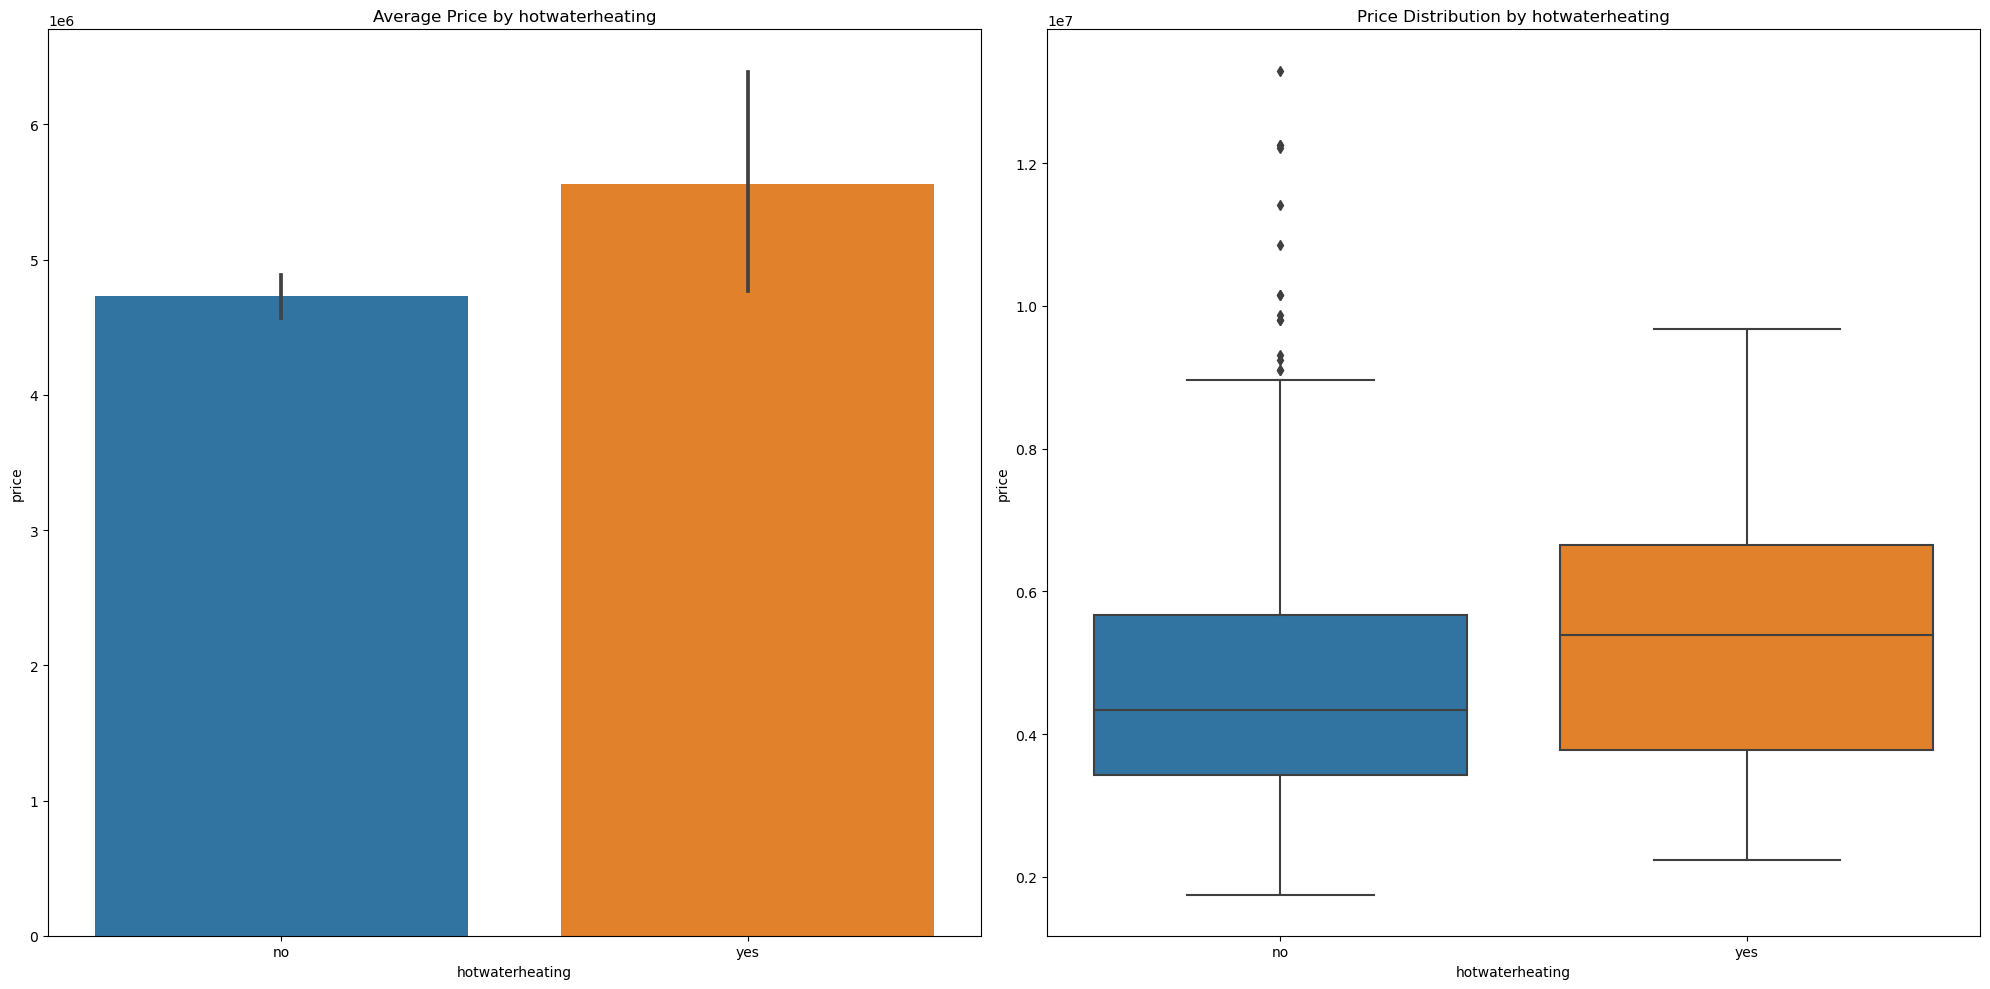

Bivariate analysis between airconditioning and price


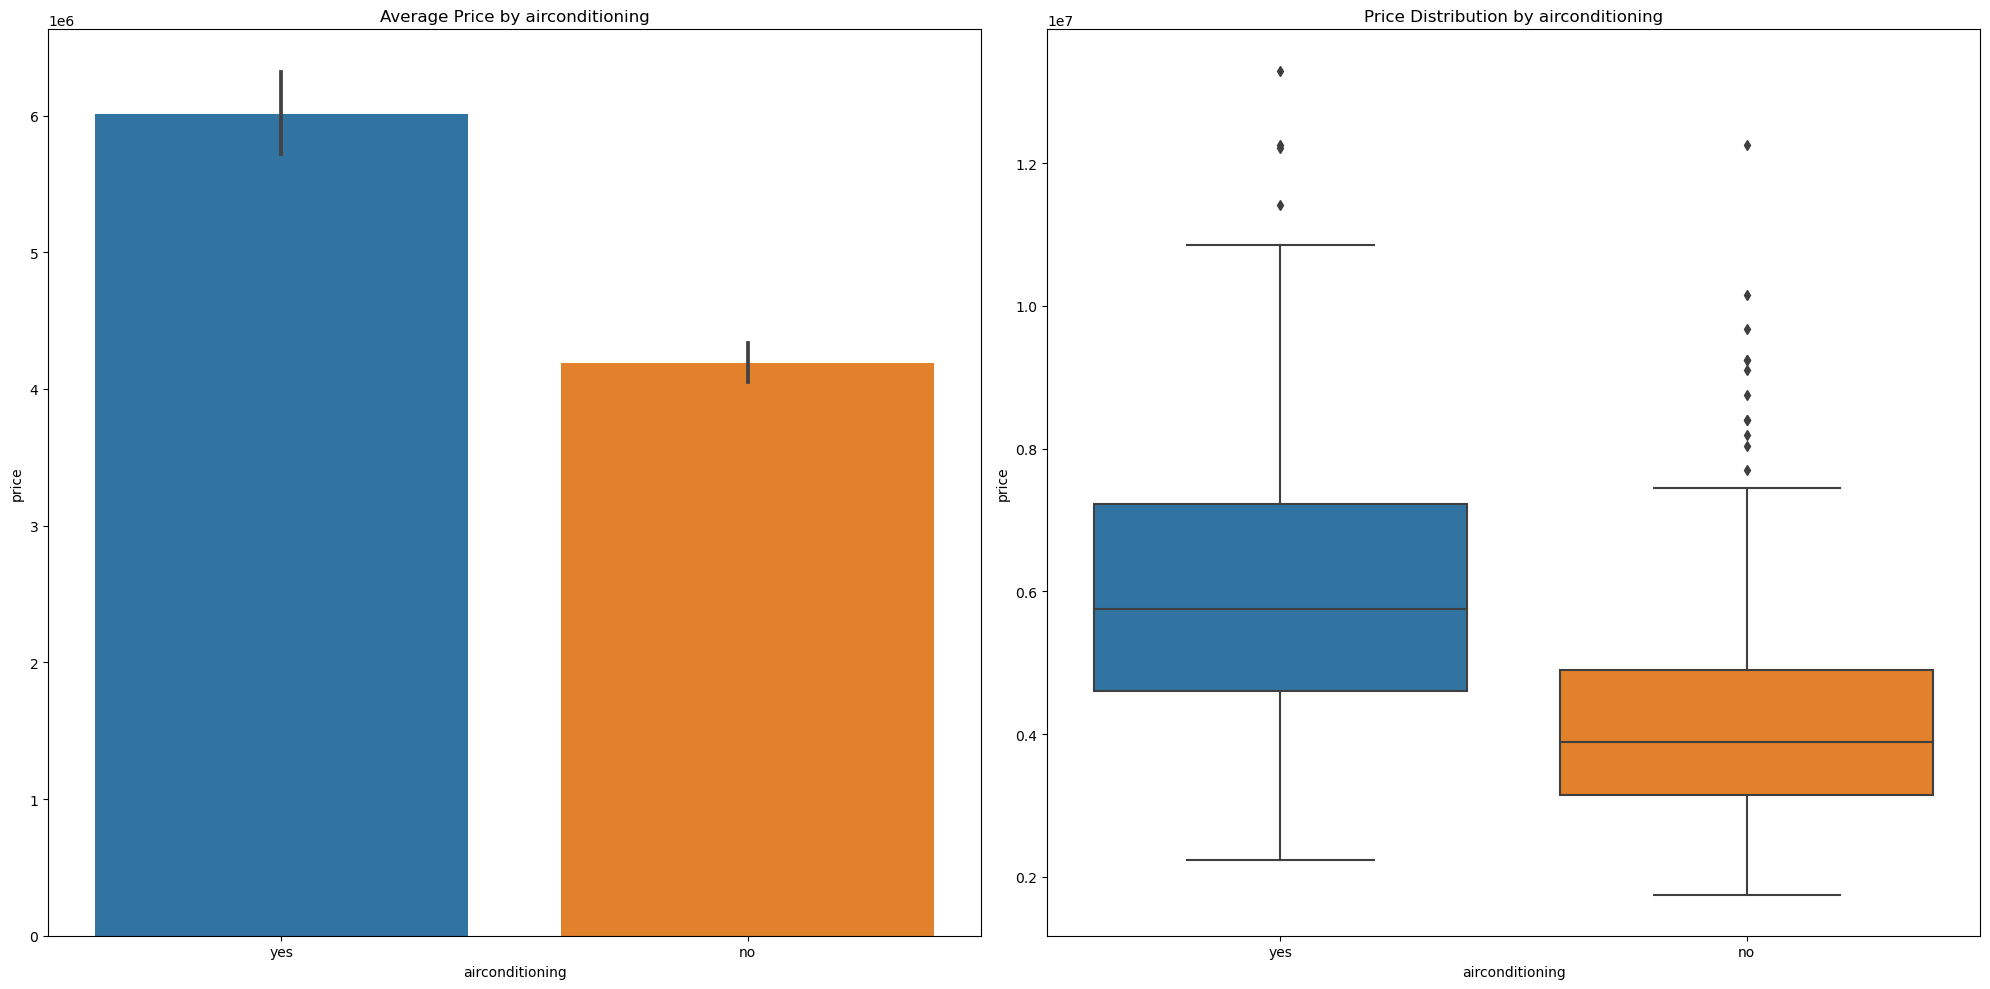

Bivariate analysis between prefarea and price


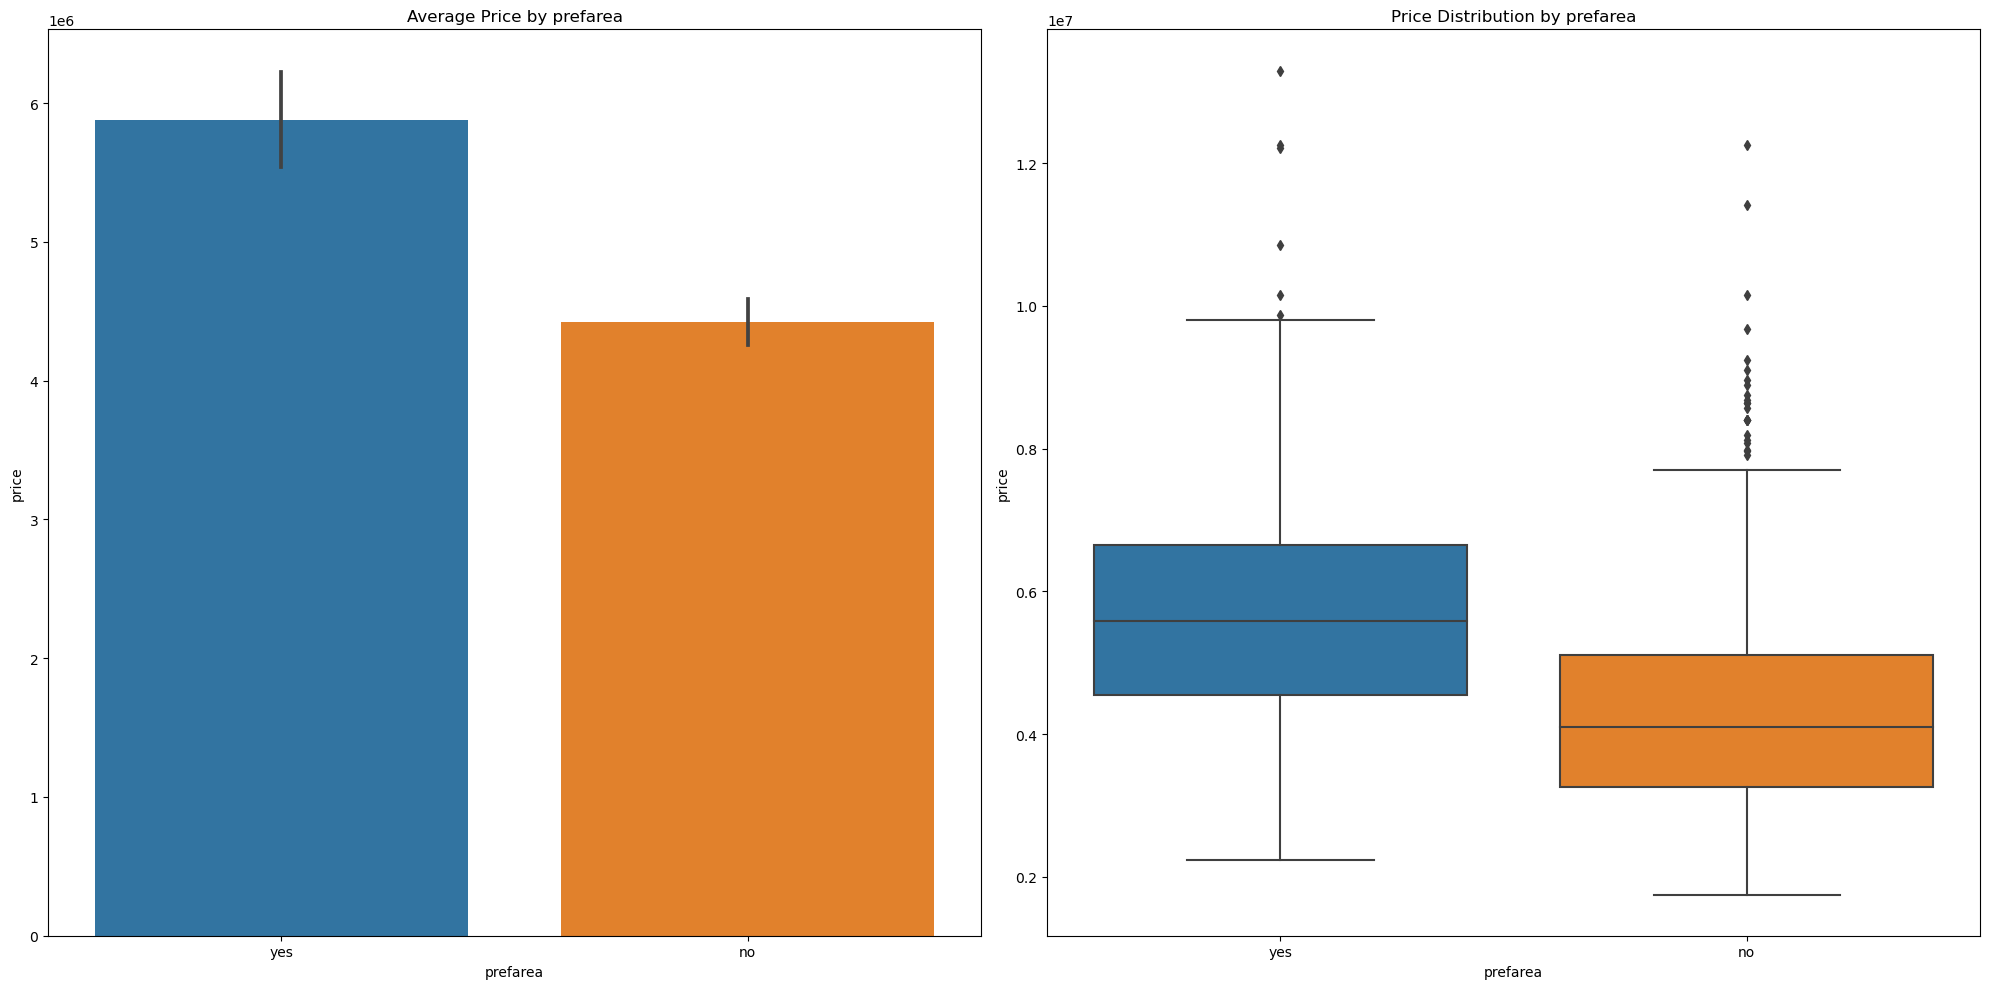

Bivariate analysis between furnishingstatus and price


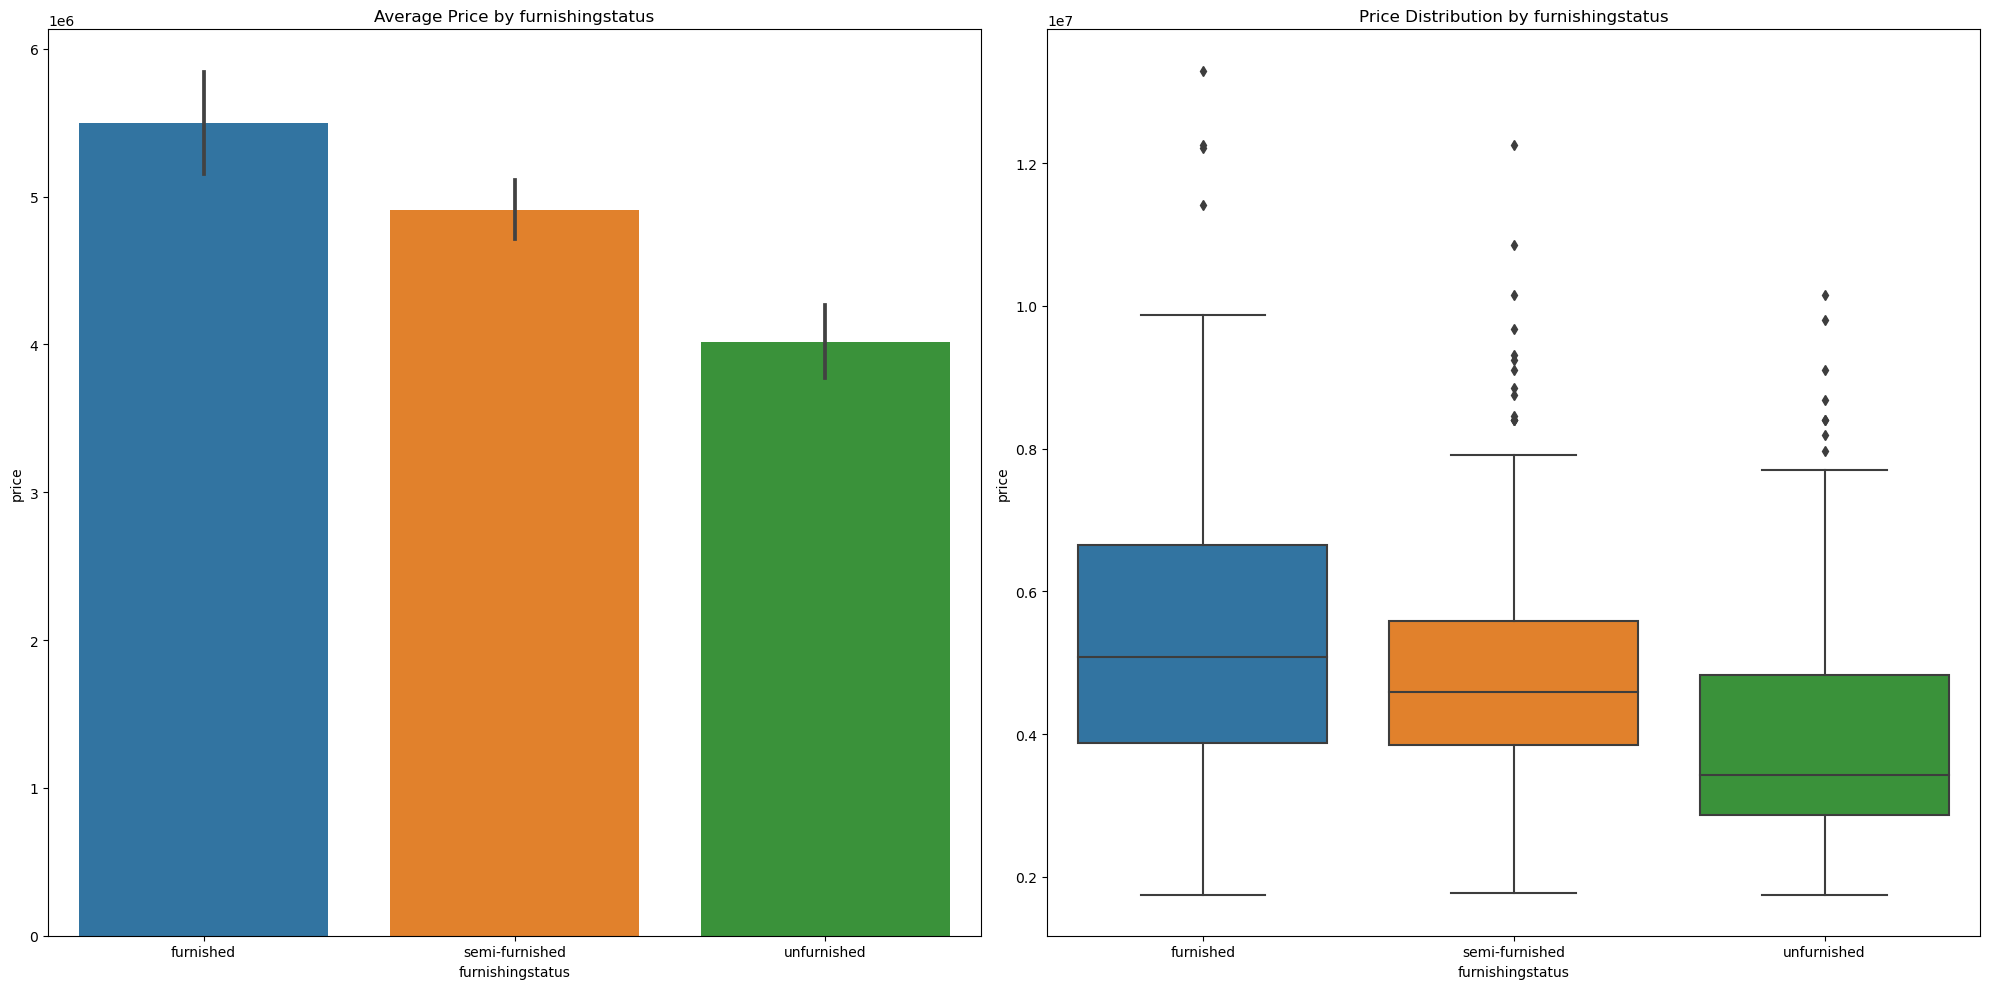

In [8]:
# Data Visualization: Bivariate analysis between categorical columns and 'price'
def bivariate_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    sns.barplot(x=col, y='price', data=df, ax=ax[0])
    ax[0].set_title(f'Average Price by {col}')

    sns.boxplot(x=col, y='price', data=df, ax=ax[1])
    ax[1].set_title(f'Price Distribution by {col}')
    plt.tight_layout()
    plt.show()
    
for col in cat_cols[1:]:
    print(f'Bivariate analysis between {col} and price')
    bivariate_cat(col)

In [9]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cat_cols:
    df[col]=le.fit_transform(df[col])
df

,price,area(m2),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [10]:
# Splitting data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

In [11]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 6615182.19633742  3707148.43316485  7254808.31610258  5174125.45953772
  3855860.15507448  7471782.57702613  3895636.31983817  4562609.81281896
  4470842.7411571   5032531.36057928  5491965.52892866  3227138.74317102
  4030376.73514878  5232462.26810617  3838828.33822351  7820656.52285093
  4796114.94383158  4120629.4580745   5472563.8508199   2626414.94165352
  5791888.33959603  5638977.45631611  4927636.23032897  3306283.49753501
  5244070.25983729  5611553.55358995  6399482.89927102  4878458.57973773
  2760298.93722958  3892188.13989706  5871830.41615371  2849894.29475326
  6760407.58147553  5194758.27675453  6402968.7671679   3187368.2668007
  7887262.27878563  3729296.67045394  5854021.0344367   2739030.76762283
  2815452.21868463  5036249.07709599  5324847.95061987  6092000.53074154
  2236323.44593048  4498791.49088766  4643008.97358207  6699019.17761153
  3488359.11777759  3807722.08668562  5688376.96391199  2522280.184214
  2794948.00537748  4788073.09029121  6478914.88796556

In [12]:
# Model evaluation using metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred))

mean squared error: 1281270915981.0598 

r2_score :  0.6000245550432184


Conclusion:

The analysis revealed that 'area(m2)', 'number_of_rooms', and 'location' significantly impact housing prices, showing strong correlations with property values. Larger property sizes and specific locations tend to command higher prices. The Linear Regression model provided reasonable predictive capability, explaining a notable percentage of the variance in housing prices. However, anomalies in larger property areas impacted predictive accuracy. Further outlier handling and advanced modeling techniques could enhance the model's performance.

This analysis offers crucial insights into housing price determinants, aiding stakeholders in real estate decision-making and suggesting avenues for refining predictive models.